In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
ess = pd.read_csv("ess_combined_2012_2014.csv")

In [3]:
#Getting to know the data
print(ess.head(10))
print(ess.info())

  cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0    CH     5     6      3        3       10       5      8        5       4   
1    CH    25     6      6        5        7       5      9        3       2   
2    CH    26     6      1        8        8       8      7        6       3   
3    CH    28     6      4        6        6       7     10        6       2   
4    CH    29     6      5        6        7       5      8        7       2   
5    CH    40     6      3        0        5       2      0        2       2   
6    CH    41     6      2        4        5       3     10        5       2   
7    CH    51     6      2        8        8       8      9        6       4   
8    CH    53     6      4        4        4       8      7        4       2   
9    CH    55     6      1        6        7       7      9        5       2   

   gndr  agea  partner  
0     2    60        1  
1     2    59        1  
2     1    24        2  
3     2    64      

In [4]:
#Loooking for missing values
ess.isnull().sum()

cntry      0
idno       0
year       0
tvtot      0
ppltrst    0
pplfair    0
pplhlp     0
happy      0
sclmeet    0
sclact     0
gndr       0
agea       0
partner    0
dtype: int64

In [5]:
ess.groupby(['year']).agg(['count'])

,cntry,idno,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
,count,count,count,count,count,count,count,count,count,count,count,count
year,,,,,,,,,,,,
6,4071,4071,4071,4071,4071,4071,4071,4071,4071,4071,4071,4071
7,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076


In [6]:
#Did people become less trusting from 2012 to 2014?
ess.ppltrst

0       3
1       5
2       8
3       6
4       6
       ..
8142    4
8143    6
8144    5
8145    8
8146    6
Name: ppltrst, Length: 8147, dtype: int64

In [7]:
#splitting the data according to year
ess_2012 = ess[ess.year == 6]
ess_2014 = ess[ess.year == 7]

In [8]:
print(len(ess_2012))
print(len(ess_2014))

4071
4076


In [10]:
print(stats.describe(ess_2012['ppltrst']))
print(stats.describe(ess_2014['ppltrst']))

DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1076708d0>,
      dtype=object)

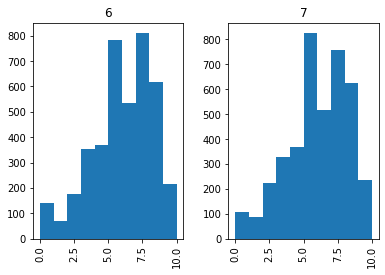

In [9]:
ess['ppltrst'].hist(by = ess['year'])

In [11]:
#LOOKING AT THE ABOVE PLOTS, SKEWNESS AND KURTOSIS, IT APPEARS THAT THE DATA FOLLOWS 
#APPROXIMATELY NORMAL DISTRIUTION

In [12]:
stats.ttest_ind(ess_2012['ppltrst'], ess_2014['ppltrst'])

Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)

In [13]:
# we fail to reject Null Hypothesis and it appears the ppltrust does not have significant difference between
#year 2012 and year #2014

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a19ee24e0>,
      dtype=object)

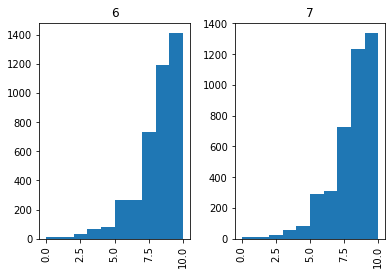

In [15]:
#Did people become happier from 2012 to 2014? 
ess['happy'].hist(by = ess['year'])

In [18]:
print(stats.describe(ess_2012['happy']))
print(stats.describe(ess_2014['happy']))

DescribeResult(nobs=4071, minmax=(0, 10), mean=7.731515598133137, variance=3.0819524689826823, skewness=-1.1505518232802756, kurtosis=1.9055890346061979)
DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)


In [19]:
stats.kruskal(ess_2012['happy'], ess_2014['happy'])

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

In [20]:
#based on kruska we fail to reject Null hyppothesis that both groups have same distribution

In [21]:
#Pick three or four of the countries in the sample and compare how often people met socially in 
#2014. Are there differences, and if so, which countries stand out?

In [22]:
ess_2014.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [27]:
four_countries = ['CH', 'CZ', 'DE', 'ES']

In [30]:
ess_2014_4 = ess_2014[ess_2014['cntry'].isin(four_countries)]

In [34]:
ess_2014_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2497 entries, 732 to 5000
Data columns (total 13 columns):
cntry      2497 non-null object
idno       2497 non-null int64
year       2497 non-null int64
tvtot      2497 non-null int64
ppltrst    2497 non-null int64
pplfair    2497 non-null int64
pplhlp     2497 non-null int64
happy      2497 non-null int64
sclmeet    2497 non-null int64
sclact     2497 non-null int64
gndr       2497 non-null int64
agea       2497 non-null int64
partner    2497 non-null int64
dtypes: int64(12), object(1)
memory usage: 273.1+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ccd9b38>,
      dtype=object)

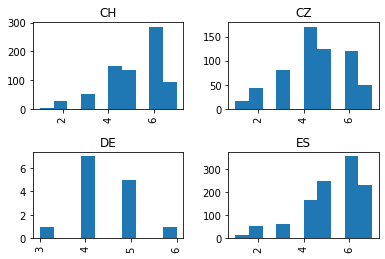

In [35]:
ess_2014_4['sclmeet'].hist(by = ess_2014_4['cntry'])

In [38]:
ch = ess_2014_4[ess_2014_4['cntry'] == 'CH']
cz = ess_2014_4[ess_2014_4['cntry'] == 'CZ']
de = ess_2014_4[ess_2014_4['cntry'] == 'DE']
es = ess_2014_4[ess_2014_4['cntry'] == 'ES']

In [39]:
print(stats.describe(ch['sclmeet']))
print(stats.describe(cz['sclmeet']))
print(stats.describe(de['sclmeet']))
print(stats.describe(es['sclmeet']))

DescribeResult(nobs=743, minmax=(1, 7), mean=5.174966352624495, variance=1.6944129031789972, skewness=-0.6382977240097087, kurtosis=-0.24036067403841654)
DescribeResult(nobs=606, minmax=(1, 7), mean=4.4950495049504955, variance=2.164438262008019, skewness=-0.22873689943815514, kurtosis=-0.49084441486724817)
DescribeResult(nobs=14, minmax=(3, 6), mean=4.428571428571429, variance=0.5714285714285714, skewness=0.24891663306000175, kurtosis=-0.20118343195266197)
DescribeResult(nobs=1134, minmax=(1, 7), mean=5.263668430335097, variance=2.067222541332574, skewness=-0.8331602682762435, kurtosis=0.2132945592754396)


In [40]:
stats.kruskal(ch['sclmeet'], cz['sclmeet'], de['sclmeet'], es['sclmeet'])

KruskalResult(statistic=131.71067637166595, pvalue=2.314201415479699e-28)

based on kruska we can reject Null hyppothesis that all groups have same distribution, from the box plot below 
it appears that DE is the odd one out

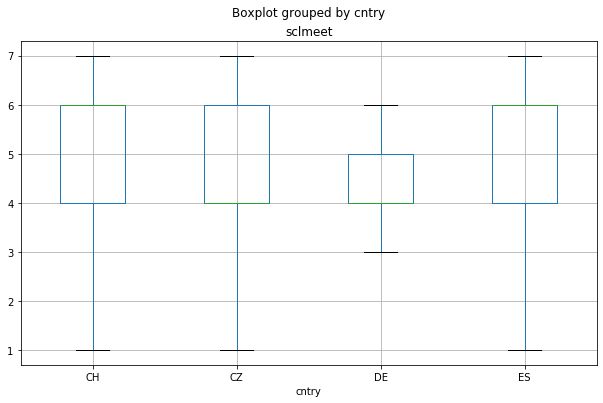

In [43]:
ess_2014_4.boxplot('sclmeet', by = 'cntry', figsize = (10,6))

Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22d9e2e8>,
      dtype=object)

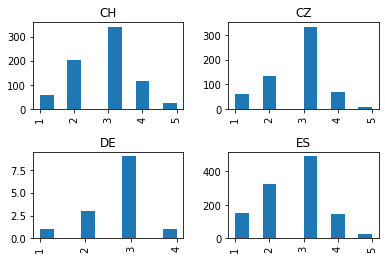

In [45]:
ess_2014_4['sclact'].hist(by = ess_2014_4['cntry'])

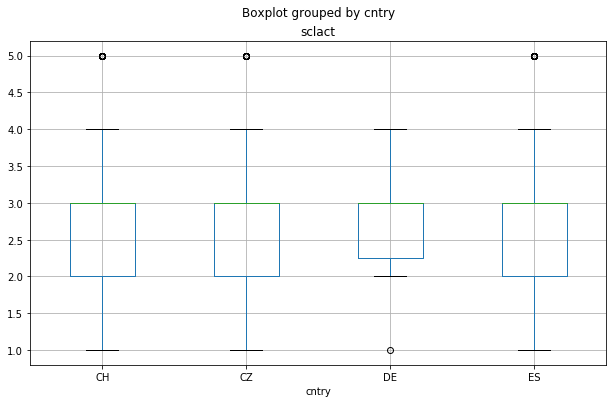

In [47]:
ess_2014_4.boxplot('sclact', by = 'cntry', figsize = (10,6))

In [48]:
stats.kruskal(ch['sclact'], cz['sclact'], de['sclact'], es['sclact'])

KruskalResult(statistic=13.324211087504507, pvalue=0.003985447789262824)

Based on P value we can reject the null that all cariables have the same distribution and by looking at the above plots we can say the DE is the odd one out